In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'..')
import omama as O
from omama.data import Label

Populating the interactive namespace from numpy and matplotlib


In [2]:
omama_loader = O.OmamaLoader()

In [3]:
omama_loader

In [4]:
print(omama_loader)

DataLoader(data_paths=['/raid/data01/deephealth/dh_dh2/', '/raid/data01/deephealth/dh_dh0new/', '/raid/data01/deephealth/dh_dcm_ast/'], csv_paths=['/raid/data01/deephealth/labels/dh_dh2_labels.csv', '/raid/data01/deephealth/labels/dh_dh0new_labels.csv', '/raid/data01/deephealth/labels/dh_dcm_ast_labels.csv'], pickle_path=../../../../../hpcstor6/scratch01/r/ryan.zurrin001/pickle/labelData, dicom_tags=['SamplesPerPixel', 'PhotometricInterpretation', 'PlanarConfiguration', 'Rows', 'Columns', 'PixelAspectRatio', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'SmallestImagePixelValue', 'LargestImagePixelValue', 'PixelPaddingRangeLimit', 'RedPaletteColorLookupTableDescriptor', 'GreenPaletteColorLookupTableDescriptor', 'BluePaletteColorLookupTableDescriptor', 'RedPaletteColorLookupTableData', 'GreenPaletteColorLookupTableData', 'BluePaletteColorLookupTableData', 'ICCProfile', 'ColorSpace', 'PixelDataProviderURL', 'ExtendedOffsetTable', 'NumberOfFrames', 'ExtendedOffsetTableL

In [3]:
data = O.Data(data_loader=omama_loader, timing = True, print_data= True, load_cache=True)

load_studies             ...took     0.210834 seconds
load_images              ...took     3.938213 seconds
csv_to_map               ...took     0.219857 seconds
load_pickle              ...took     0.093955 seconds
generate_counts          ...took     1.031537 seconds
generate_stats           ...took     3.497626 seconds
initialize               ...took     9.052994 seconds
total _init_             ...took     9.053099 seconds
namespace(folder0=namespace(total=22144, three_d=9363, two_d=12781),
          folder1=namespace(total=126460, three_d=62736, two_d=63724),
          folder2=namespace(total=819387, three_d=58, two_d=819329),
          total_all_dicoms=967991,
          total_2d_all=895834,
          total_3d_all=72157,
          total_2d_cancer=14965,
          total_2d_preindex=1915,
          total_2d_noncancer=855763,
          total_3d_cancer=376,
          total_3d_preindex=0,
          total_3d_noncancer=67162,
          total_cancer=15341,
          total_preindex=1915,


In [4]:
import time
img = []
t0 = time.time()
generator = data.next_image(_2d = True, label = Label.CANCER, timing = True)
for i in range(10):
    img.append(next(generator))
    if i % 1 == 0:
        print(i, "...took", time.time()-t0,"seconds" )

size of filtered data:  14965  ...took  0.10644102096557617  seconds
0 ...took 0.6052179336547852 seconds
1 ...took 1.0915555953979492 seconds
2 ...took 1.3568155765533447 seconds
3 ...took 1.5898921489715576 seconds
4 ...took 1.853386640548706 seconds
5 ...took 2.127711534500122 seconds
6 ...took 2.4010207653045654 seconds
7 ...took 2.673798084259033 seconds
8 ...took 2.9557957649230957 seconds
9 ...took 3.231011152267456 seconds


In [15]:
img[0]

namespace(filePath='/raid/data01/deephealth/dh_dcm_ast/2.25.100019467787541382690455566629544103893/DXm.2.25.124381528605702917763164197238060295247',
          label='IndexCancer',
          shape=(3062, 2394),
          pixels=array([[3357, 3265, 3175, ...,    9,    3,    4],
                        [3327, 3223, 3135, ...,    7,    5,    4],
                        [3266, 3137, 3073, ...,    8,    8,    8],
                        ...,
                        [2352, 2395, 2431, ...,   19,   19,   20],
                        [2340, 2367, 2417, ...,   17,   19,   21],
                        [2340, 2383, 2403, ...,   18,   15,   17]], dtype=uint16))

In [8]:
import time
t0 = time.time()
from pydicom.data import get_testdata_file
path = r'/raid/data01/deephealth/dh_dcm_ast/2.25.248759284138013060096863671623117297486/BT.2.25.123204232252392180492801746224515939015'
ds = dicom.dcmread(path)
print("... took ", time.time()-t0)

... took  0.05725693702697754


In [10]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Breast Tomosynthesis Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.123204232252392180492801746224515939015
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_364'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'VOLUME', 'NONE']
(0008, 0016) SOP Class UID                       UI: Breast Tomosynthesis Image Storage
(0008, 0018) SOP Instance UID                    U

In [11]:
ds.pixel_array.shape

(77, 2457, 1996)

In [12]:
t0 = time.time()
pixel_data = ds.PixelData
print("... took ", time.time()-t0)

... took  6.890296936035156e-05


In [24]:
from pydicom.encaps import generate_pixel_data


In [ ]:
generate_pixel_data

In [25]:
# returns a generator
frame_generator = generate_pixel_data(ds.PixelData)
# first frame
frame = next(frame_generator)

In [71]:
import sys

original_stdout = sys.stdout # Save a reference to the original standard output

with open('frame_tuple.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(frame)
    sys.stdout = original_stdout

In [61]:
pix_arr = np.fromstring(frame)

TypeError: a bytes-like object is required, not 'tuple'

In [63]:
arr = np.frombuffer(frame, dtype=np.uint16)

TypeError: a bytes-like object is required, not 'tuple'

In [68]:
pix_arr = np.ndarray((ds.Rows, ds.Columns), numpy.float64, frame)

TypeError: a bytes-like object is required, not 'tuple'

In [36]:
t0 = time.time()
frames = []
frame_generator = generate_pixel_data(ds.PixelData)
for i in range(ds.NumberOfFrames):
    frames.append(next(frame_generator))
    print(i)
print("... took ", time.time() - t0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
... took  0.02787184715270996


In [43]:
nr_frames = ds.NumberOfFrames
sr_samples = ds.SamplesPerPixel
rows = int(ds.Rows)
cols = int(ds.Columns)

In [44]:
from pydicom.pixel_data_handlers import gdcm_handler as gdcm

In [53]:
test1 = gdcm.generate_pixel_data(ds.PixelData)

In [54]:
test2 = next(test1)

In [56]:
ds.PixelPaddingRangeLimit

4

In [57]:
ds.PixelPaddingValue

0

In [58]:
ds.PixelRepresentation

0

In [59]:
ds.PixelPresentation

'MONOCHROME'

In [55]:
test2

(b'\xff\xd8\xff\xc4\x00\x1e\x00\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x03\x04\x05\x02\x01\x06\t\x08\x07\n\xff\xc3\x00\x0b\n\t\x99\x07\xcc\x01\x01\x11\x00\xff\xda\x00\x08\x01\x01\x00\x01\x00\x00\xff\x00\x9f\xf0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [65]:
pixel_arr_frame1 = numpy.fromstring(frame).reshape(ds.Rows, ds.Columns)

TypeError: a bytes-like object is required, not 'tuple'

In [64]:
arr = np.frombuffer(pixel_data, dtype=np.uint8)

In [67]:
len(arr)

86094644

In [69]:
pix_arr = np.ndarray((ds.NumberOfFrames, ds.Rows, ds.Columns), numpy.float64, arr)

TypeError: buffer is too small for requested array

In [21]:
import time
t0 = time.time()
path = '/raid/data01/deephealth/dh_dh2/2.25.23697001741413135128882662590024074006/BT.2.25.46184881038078258419103219076910542642'
ds = dicom.dcmread(path, specific_tags=["SamplesPerPixel", "PhotometricInterpretation", "PlanarConfiguration", "Rows", "Columns",
                          "PixelAspectRatio", "BitsAllocated", "BitsStored", "HighBit", "PixelRepresentation",
                          "SmallestImagePixelValue", "LargestImagePixelValue", "PixelPaddingRangeLimit",
                          "RedPaletteColorLookupTableDescriptor", "GreenPaletteColorLookupTableDescriptor",
                          "BluePaletteColorLookupTableDescriptor", "RedPaletteColorLookupTableData",
                          "GreenPaletteColorLookupTableData", "BluePaletteColorLookupTableData", "ICCProfile",
                          "ColorSpace", "PixelDataProviderURL", "ExtendedOffsetTable", "NumberOfFrames",
                          "ExtendedOffsetTableLengths", "PixelData"])
array3d = ds.pixel_array
print("...took ", time.time() - t0)

...took  24.514699459075928


In [23]:
ds.NumberOfFrames
array3d.shape

(81, 2457, 1996)

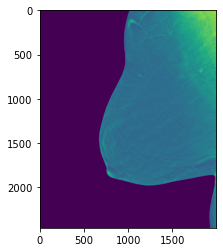

In [25]:
plt.imshow(array3d[0,:, :])

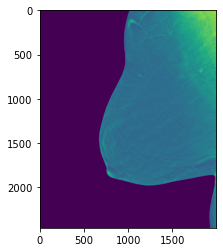

In [26]:
plt.imshow(array2d)

In [29]:
array3d[0,:, :].all()==array2d.all()

True

In [11]:
import pydicom as dicom
import time
t0 = time.time()
path = '/raid/data01/deephealth/dh_dh2/2.25.23697001741413135128882662590024074006/BT.2.25.46184881038078258419103219076910542642'
ds1 = dicom.filereader.dcmread(path, specific_tags=["SamplesPerPixel", "PhotometricInterpretation", "PlanarConfiguration", "Rows", "Columns",
                          "PixelAspectRatio", "BitsAllocated", "BitsStored", "HighBit", "PixelRepresentation",
                          "SmallestImagePixelValue", "LargestImagePixelValue", "PixelPaddingRangeLimit",
                          "RedPaletteColorLookupTableDescriptor", "GreenPaletteColorLookupTableDescriptor",
                          "BluePaletteColorLookupTableDescriptor", "RedPaletteColorLookupTableData",
                          "GreenPaletteColorLookupTableData", "BluePaletteColorLookupTableData", "ICCProfile",
                          "ColorSpace", "PixelDataProviderURL", "ExtendedOffsetTable",
                          "ExtendedOffsetTableLengths", "PixelData"])
array2d = ds.pixel_array
print("...took ", time.time() - t0)

...took  1.0054304599761963


In [12]:
img = array3d[array3d.shape[0] // 2]

In [13]:
img == array2d

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

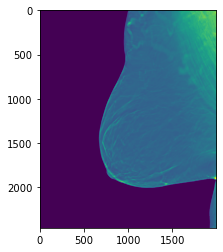

In [18]:
import matplotlib.pyplot as plt
plt.imshow(img)

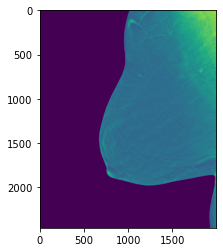

In [19]:
plt.imshow(array2d)

In [28]:
data.stats.folder0.three_d

9363

In [15]:
data.stats.folder2.total

819387

In [ ]:
img[0]

In [12]:
len(img[3].shape)

3

In [5]:
data._get_path(dicom_name='DXm.2.25.81576056370654463210693851855932156432')

'/raid/data01/deephealth/dh_dh0new/2.25.244645250224793309149323750914470862805/DXm.2.25.81576056370654463210693851855932156432'

In [6]:
data.get_file_names_in_series(study_instance_uid='2.25.51210434826926899234652970476290289005')

['DXm.2.25.246770720913772109528493221568235723584',
 'DXm.2.25.100352479040876694476459163906354228192',
 'DXm.2.25.85839855885371616746789272392413108352',
 'DXm.2.25.110500082796893064992341223591794846863']

In [5]:
img[1]

(array([[2908, 2943, 2952, ...,    0,    0,    0],
        [2869, 2910, 2991, ...,    0,    0,    0],
        [2846, 2956, 2993, ...,    0,    0,    0],
        ...,
        [1430, 1188,  925, ...,    0,    0,    0],
        [1447, 1207,  944, ...,    0,    0,    0],
        [1462, 1223,  967, ...,    0,    0,    0]], dtype=uint16),
 {'filePath': '/raid/data01/deephealth/dh_dcm_ast/2.25.10076183469920171345093105125991727647/DXm.2.25.330187425237999289553547477079982163539',
  'label': 'PreIndexCancer',
  'shape': (2294, 1914)})

In [13]:
import time
img3d = []
t0 = time.time()
generator = data.next_image(_3d = True, label = Label.CANCER, timing = True)
for i in range(10):
    img3d.append(next(generator))
    print(i, "...took", time.time()-t0,"seconds" )

size of filtered data:  376  ...took  0.12584686279296875  seconds
0 ...took 21.05885910987854 seconds


In [14]:
img3d[5]

(array([[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ..., 549, 480, 503],
         [  0,   0,   0, ..., 543, 498, 515],
         [  0,   0,   0, ..., 492, 479, 490]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ..., 484, 465, 470],
         [  0,   0,   0, ..., 511, 483, 497],
         [  0,   0,   0, ..., 516, 497, 480]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ..., 474, 468, 474],
         [  0,   0,   0, ..., 497, 468, 475],
         [  0,   0,   0, ..., 476, 452, 454]],
 
        ...,
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,

In [7]:
data.get_study(study_instance_uid='2.25.10387335582770874646281421650843359381')

namespace(directory='/raid/data01/deephealth/dh_dh0new/2.25.10387335582770874646281421650843359381',
          Study_UID='2.25.10387335582770874646281421650843359381',
          ID='',
          images=['DXm.2.25.7105860005892544414048419613702270984',
                  'DXm.2.25.34393321181422732362708862077044574162',
                  'DXm.2.25.199811381614510125916922909435181045283',
                  'BT.2.25.287417451553593072281164165868824259319',
                  'BT.2.25.312351113451520848293621641340827348226',
                  'BT.2.25.25967906531308168040671271408135527531'],
          info=None)

In [8]:
data.view(dicom_name=data.get_study(study_instance_uid='2.25.10387335582770874646281421650843359381').images[3],timing=True)

AttributeError: 'Data' object has no attribute 'view'

In [9]:
data.get_study(study_instance_uid='2.25.10387335582770874646281421650843359381')

namespace(directory='/raid/data01/deephealth/dh_dh0new/2.25.10387335582770874646281421650843359381',
          Study_UID='2.25.10387335582770874646281421650843359381',
          ID='',
          images=['DXm.2.25.7105860005892544414048419613702270984',
                  'DXm.2.25.34393321181422732362708862077044574162',
                  'DXm.2.25.199811381614510125916922909435181045283',
                  'BT.2.25.287417451553593072281164165868824259319',
                  'BT.2.25.312351113451520848293621641340827348226',
                  'BT.2.25.25967906531308168040671271408135527531'],
          info=None)

In [7]:
img[1]

(array([[[  0,   0,   0, ..., 338, 384, 386],
         [  0,   0,   0, ..., 360, 357, 342],
         [  0,   0,   0, ..., 352, 335, 302],
         ...,
         [  0,   0,   0, ..., 702, 743, 695],
         [  0,   0,   0, ..., 725, 687, 660],
         [  0,   0,   0, ..., 636, 662, 672]],
 
        [[  0,   0,   0, ..., 351, 361, 344],
         [  0,   0,   0, ..., 362, 334, 298],
         [  0,   0,   0, ..., 343, 308, 326],
         ...,
         [  0,   0,   0, ..., 678, 737, 720],
         [  0,   0,   0, ..., 694, 718, 710],
         [  0,   0,   0, ..., 732, 690, 655]],
 
        [[  0,   0,   0, ..., 356, 330, 303],
         [  0,   0,   0, ..., 347, 312, 321],
         [  0,   0,   0, ..., 319, 285, 322],
         ...,
         [  0,   0,   0, ..., 695, 722, 680],
         [  0,   0,   0, ..., 685, 740, 714],
         [  0,   0,   0, ..., 681, 697, 726]],
 
        ...,
 
        [[  0,   0,   0, ..., 357, 367, 359],
         [  0,   0,   0, ..., 376, 402, 393],
         [  0,

In [8]:
img[2]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [4]:
data.image_paths[8]

'/raid/data01/deephealth/dh_dcm_ast/2.25.100001373726337750354689693677327988604/DXm.2.25.275395047981175631229220204776148301030'

In [3]:
i = 0
count = 0
address_list = []
for label in data.labels:
    if data.labels[i] == 'No Label Information':
        address_list.append(data.image_paths[i])
        count += 1
    i += 1
print(count)

27810


In [5]:
address_list

['/raid/data01/deephealth/dh_dcm_ast/2.25.100086330662014788502705013753579389955/DXm.2.25.193320554194522933575142238624969033012',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100086330662014788502705013753579389955/DXm.2.25.226789913518234344314763240933640657382',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100086330662014788502705013753579389955/DXm.2.25.27112402742739051589223384135888728764',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100086330662014788502705013753579389955/DXm.2.25.97158241467928760265160399454963236218',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100089622154792433560942023224872151761/DXm.2.25.198593849774470284571550710164542903876',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100089622154792433560942023224872151761/DXm.2.25.209067585009265337465413181338999945927',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100089622154792433560942023224872151761/DXm.2.25.266881830139397934304408617071713373625',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.10008962215479243356094202322

In [13]:
data.get_image(image_id = 44488, dicom_header=True, timing=True)

_get_dicom               ...took     0.006164 seconds
get_image                ...took     0.480915 seconds


(array([[2808, 2776, 2779, ...,    0,    0,    0],
        [2790, 2817, 2806, ...,    0,    0,    0],
        [2845, 2822, 2835, ...,    0,    0,    0],
        ...,
        [   0,    4,    5, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16),
 namespace(label='NonCancer',
           filePath='/raid/data01/deephealth/dh_dcm_ast/2.25.116442014904326158230032181567281079135/DXm.2.25.291182114919890709955686147769202091658',
           imageLaterality='L',
           shape=(3062, 2394),
           metadata=Dataset.file_meta -------------------------------
                    (0002, 0000) File Meta Information Group Length  UL: 192
                    (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
                    (0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
                    (0002, 0003) Media Storage SOP Insta

view                     ...took     0.494350 seconds


(3062, 2394)

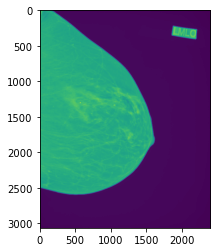

In [14]:
data.view(image_id=44488, timing = True)

view                     ...took     0.291448 seconds


(2294, 1914)

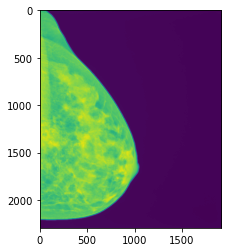

In [15]:
data.view(image_id=444548, timing = True)

view                     ...took     0.428015 seconds


(3062, 2394)

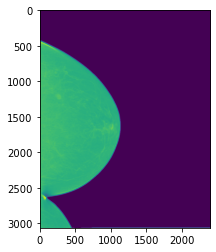

In [16]:
data.view(image_id=441488, timing = True)

In [3]:
data.get_image(image_id=441488, timing = True)

_get_dicom               ...took     0.004198 seconds
get_image                ...took     0.433974 seconds


namespace(label='NonCancer',
          filePath='/raid/data01/deephealth/dh_dcm_ast/2.25.265384743238727158308376610573002981955/DXm.2.25.321259829460914254449887854732591670142',
          imageLaterality=None,
          shape=(3062, 2394),
          metadata=None,
          pixels=array([[   0,    0,    0, ...,    0,    0,    0],
                        [   0,    0,    0, ...,    0,    0,    0],
                        [   0,    0,    0, ...,    0,    0,    0],
                        ...,
                        [2702, 2731, 2687, ..., 1450, 1446, 1455],
                        [2739, 2754, 2748, ..., 1613, 1609, 1620],
                        [2815, 2813, 2825, ..., 1782, 1784, 1790]], dtype=uint16))

In [4]:
data.get_study('2.25.113906145535253451341013717252091182756',timing=True)

get_path                 ...took     0.018717 seconds
get_file_names_in_series ...took     0.000093 seconds
get_study                ...took     0.019129 seconds


namespace(directory='/raid/data01/deephealth/dh_dcm_ast/2.25.113906145535253451341013717252091182756',
          Study_UID='2.25.113906145535253451341013717252091182756',
          ID='',
          images=['DXm.2.25.40402592547829809036627423081830749600',
                  'DXm.2.25.165984939304863691551378945632150139228',
                  'DXm.2.25.303711300619532053936661050692972282983',
                  'DXm.2.25.283679168570723043133458180002981691038',
                  'DXm.2.25.196483602247548126835093784408144002202',
                  'DXm.2.25.86341215549048887779380663351534081416',
                  'DXm.2.25.61558226494934909314508777358187646099'],
          info=None)

In [19]:
data.get_image(dicom_name=data.get_study('2.25.113906145535253451341013717252091182756').images[2],dicom_header=True)

('image format not supported', None)

In [20]:
data.get_image(dicom_name=data.get_study(study_instance_uid='2.25.116442014904326158230032181567281079135').images[0],dicom_header=True )

(array([[ 260,  254,  256, ...,  353,  353,  355],
        [ 253,  256,  256, ...,  353,  355,  353],
        [ 258,  257,  261, ...,  356,  354,  355],
        ...,
        [ 231,  237,  232, ..., 2778, 2780, 2770],
        [ 230,  232,  233, ..., 2780, 2784, 2748],
        [ 231,  230,  235, ..., 2730, 2763, 2797]], dtype=uint16),
 namespace(label='NonCancer',
           filePath='/raid/data01/deephealth/dh_dcm_ast/2.25.116442014904326158230032181567281079135/DXm.2.25.184695305353394420486600135051027558666',
           imageLaterality='R',
           shape=(3062, 2394),
           metadata=Dataset.file_meta -------------------------------
                    (0002, 0000) File Meta Information Group Length  UL: 192
                    (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
                    (0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
                    (0002, 0003) Media Storage SOP Insta

In [16]:
data.get_image(dicom_name = 'DXm.2.25.167348012638942493905999335217470855277', timing=True)

_get_dicom               ...took     0.003888 seconds
get_image                ...took     0.498608 seconds


namespace(label='NonCancer',
          filePath='/raid/data01/deephealth/dh_dh2/2.25.23697001741413135128882662590024074006/DXm.2.25.167348012638942493905999335217470855277',
          imageLaterality=None,
          shape=(2457, 1996),
          metadata=None,
          pixels=array([[  0,   0,   0, ...,   0,   0,   0],
                        [  0,   0,   0, ...,   0,   0,   0],
                        [  0,   0,   0, ...,   0,   0,   0],
                        ...,
                        [  0,   0,   0, ..., 603, 655, 630],
                        [  0,   0,   0, ..., 641, 675, 586],
                        [  0,   0,   0, ..., 647, 637, 650]], dtype=uint16))

In [11]:
path = '/raid/data01/deephealth/dh_dcm_ast/2.25.116442014904326158230032181567281079135/DXm.2.25.291182114919890709955686147769202091658'
data.get_image(path=path, timing=True)

_get_dicom               ...took     0.003794 seconds
get_image                ...took     0.472574 seconds


namespace(label='NonCancer',
          filePath='/raid/data01/deephealth/dh_dcm_ast/2.25.116442014904326158230032181567281079135/DXm.2.25.291182114919890709955686147769202091658',
          imageLaterality=None,
          shape=(3062, 2394),
          metadata=None,
          pixels=array([[2808, 2776, 2779, ...,    0,    0,    0],
                        [2790, 2817, 2806, ...,    0,    0,    0],
                        [2845, 2822, 2835, ...,    0,    0,    0],
                        ...,
                        [   0,    4,    5, ...,    0,    0,    0],
                        [   0,    0,    0, ...,    0,    0,    0],
                        [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16))

In [12]:
img1 = data.get_image(path=path, timing=True)

_get_dicom               ...took     0.002387 seconds
get_image                ...took     0.477388 seconds


In [13]:
img1.label

'NonCancer'

In [14]:
data.get_image(image_id=data.get_image_id('DXm.2.25.291182114919890709955686147769202091658'), timing=True)

_get_dicom               ...took     0.003310 seconds
get_image                ...took     0.468637 seconds


namespace(label='NonCancer',
          filePath='/raid/data01/deephealth/dh_dcm_ast/2.25.116442014904326158230032181567281079135/DXm.2.25.291182114919890709955686147769202091658',
          imageLaterality=None,
          shape=(3062, 2394),
          metadata=None,
          pixels=array([[2808, 2776, 2779, ...,    0,    0,    0],
                        [2790, 2817, 2806, ...,    0,    0,    0],
                        [2845, 2822, 2835, ...,    0,    0,    0],
                        ...,
                        [   0,    4,    5, ...,    0,    0,    0],
                        [   0,    0,    0, ...,    0,    0,    0],
                        [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16))

In [24]:
data.get_file_names_in_series(r'/raid/data01/deephealth/dh_dcm_ast/2.25.116442014904326158230032181567281079135')

['DXm.2.25.184695305353394420486600135051027558666',
 'DXm.2.25.30384521209715942847430197316341663250',
 'DXm.2.25.291182114919890709955686147769202091658',
 'DXm.2.25.316009174027521174101933438415208560098',
 'DXm.2.25.142065096612629914941245167793421800322',
 'DXm.2.25.204944242557845943722194051973683804672']

In [25]:
data.get_file_names_in_series(study_instance_uid=r'2.25.116442014904326158230032181567281079135')

['DXm.2.25.184695305353394420486600135051027558666',
 'DXm.2.25.30384521209715942847430197316341663250',
 'DXm.2.25.291182114919890709955686147769202091658',
 'DXm.2.25.316009174027521174101933438415208560098',
 'DXm.2.25.142065096612629914941245167793421800322',
 'DXm.2.25.204944242557845943722194051973683804672']

In [26]:
data.get_image_id('DXm.2.25.225219784820478210510680076237717871365')

4377

In [27]:
print(data.get_label('2.25.102140360833788312477939597926478441153', 'R', timing = True))

get_label                ...took     0.000016 seconds
NonCancer


In [28]:
print(data.get_label('2.25.102140360833788312477939597926478441153', 'None', timing = True))

get_label                ...took     0.000004 seconds
NonCancer


In [29]:
import time
img = []
t0 = time.time()
generator = data.next_image(_2d = True, label = Label.CANCER, timing = True)
for i in range(50):
    img.append(next(generator))
    if i % 5 == 0:
        print(i, "...took", time.time()-t0,"seconds" )


size of filtered data:  14965  ...took  0.1001577377319336  seconds
read image took:  0.4784879684448242  seconds
0 ...took 0.5857765674591064 seconds
read image took:  0.48754167556762695  seconds
read image took:  0.26787543296813965  seconds
read image took:  0.23048877716064453  seconds
read image took:  0.2587108612060547  seconds
read image took:  0.272111177444458  seconds
5 ...took 2.1267008781433105 seconds
read image took:  0.2720947265625  seconds
read image took:  0.26920533180236816  seconds
read image took:  0.2777848243713379  seconds
read image took:  0.27100348472595215  seconds
read image took:  0.2675895690917969  seconds
10 ...took 3.5088465213775635 seconds
read image took:  0.26801037788391113  seconds
read image took:  0.26808667182922363  seconds
read image took:  0.2989332675933838  seconds
read image took:  0.018259763717651367  seconds
read image took:  0.018337249755859375  seconds
15 ...took 4.397257089614868 seconds
read image took:  0.0728297233581543  se

In [30]:
img[0]

(array([[3357, 3265, 3175, ...,    9,    3,    4],
        [3327, 3223, 3135, ...,    7,    5,    4],
        [3266, 3137, 3073, ...,    8,    8,    8],
        ...,
        [2352, 2395, 2431, ...,   19,   19,   20],
        [2340, 2367, 2417, ...,   17,   19,   21],
        [2340, 2383, 2403, ...,   18,   15,   17]], dtype=uint16),
 {'filePath': '/raid/data01/deephealth/dh_dcm_ast/2.25.100019467787541382690455566629544103893/DXm.2.25.124381528605702917763164197238060295247',
  'label': 'IndexCancer',
  'shape': (3062, 2394)})

In [31]:
img[1]

(array([[803, 804, 800, ..., 669, 672, 673],
        [801, 803, 796, ..., 669, 670, 672],
        [801, 798, 797, ..., 680, 678, 671],
        ...,
        [783, 799, 805, ..., 696, 694, 692],
        [785, 797, 800, ..., 701, 693, 692],
        [784, 797, 801, ..., 703, 694, 692]], dtype=uint16),
 {'filePath': '/raid/data01/deephealth/dh_dcm_ast/2.25.100019467787541382690455566629544103893/DXm.2.25.217321484352248699030844413496181043774',
  'label': 'IndexCancer',
  'shape': (3062, 2394)})

In [32]:
img[2]

(array([[ 282,  281,  283, ...,  303,  306,  313],
        [ 281,  281,  276, ...,  318,  332,  336],
        [ 283,  277,  279, ...,  337,  361,  366],
        ...,
        [ 335,  334,  331, ..., 3015, 3033, 3059],
        [ 334,  334,  332, ..., 3047, 3073, 3087],
        [ 336,  335,  332, ..., 3061, 3096, 3095]], dtype=uint16),
 {'filePath': '/raid/data01/deephealth/dh_dcm_ast/2.25.100106310335705418077395932274653810425/DXm.2.25.339919564181588105577832296801952583512',
  'label': 'IndexCancer',
  'shape': (2294, 1914)})

In [33]:
img[3]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 {'filePath': '/raid/data01/deephealth/dh_dcm_ast/2.25.100106310335705418077395932274653810425/DXm.2.25.38579031505102571256361347111343069904',
  'label': 'IndexCancer',
  'shape': (2294, 1914)})

In [34]:
img[4]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 {'filePath': '/raid/data01/deephealth/dh_dcm_ast/2.25.100106310335705418077395932274653810425/DXm.2.25.41840648022000818954245230828971871497',
  'label': 'IndexCancer',
  'shape': (2294, 1914)})

In [35]:
img[5]

(array([[   4,    3,    1, ...,    0,    0,    0],
        [   4,    8,    3, ...,    0,    0,    0],
        [  11,    3,    4, ...,    0,    0,    0],
        ...,
        [2778, 2549, 2386, ...,    0,    0,    0],
        [2761, 2495, 2391, ...,    0,    0,    0],
        [2730, 2451, 2327, ...,    0,    0,    0]], dtype=uint16),
 {'filePath': '/raid/data01/deephealth/dh_dcm_ast/2.25.100290090557015004282341117448173003433/DXm.2.25.145073787325764149610466456418871231507',
  'label': 'IndexCancer',
  'shape': (2294, 1914)})

In [36]:
img[6]

(array([[   4,    1,    1, ...,    0,    0,    0],
        [   5,    3,    5, ...,    0,    0,    0],
        [   3,    5,    7, ...,    0,    0,    0],
        ...,
        [2753, 2559, 2417, ...,    0,    0,    0],
        [2716, 2487, 2422, ...,    0,    0,    0],
        [2714, 2446, 2321, ...,    0,    0,    0]], dtype=uint16),
 {'filePath': '/raid/data01/deephealth/dh_dcm_ast/2.25.100290090557015004282341117448173003433/DXm.2.25.215618008885862934193222128967779925929',
  'label': 'IndexCancer',
  'shape': (2294, 1914)})

In [37]:
import time
img = []
t0 = time.time()
generator = data.next_image(_3d = True, label = Label.CANCER, timing = True)
for i in range(10):
    img.append(next(generator))
    print(i, "...took", time.time()-t0,"seconds" )

size of filtered data:  376  ...took  0.09821414947509766  seconds
read image took:  20.97968888282776  seconds
0 ...took 21.211382389068604 seconds
read image took:  22.341942071914673  seconds
1 ...took 43.72210335731506 seconds
read image took:  14.9652099609375  seconds
2 ...took 58.85159707069397 seconds
read image took:  14.602903842926025  seconds
3 ...took 73.633620262146 seconds
read image took:  14.79841661453247  seconds
4 ...took 88.53878927230835 seconds
read image took:  15.197025537490845  seconds
5 ...took 103.84837460517883 seconds
read image took:  14.10156774520874  seconds
6 ...took 118.05662608146667 seconds
read image took:  16.290271997451782  seconds
7 ...took 134.48008465766907 seconds
read image took:  16.093105792999268  seconds
8 ...took 150.68369150161743 seconds
read image took:  21.606651067733765  seconds
9 ...took 172.4408242702484 seconds


In [38]:
img[4]

(array([[[  0,   0,   0, ..., 453, 453, 444],
         [  0,   0,   0, ..., 442, 443, 444],
         [  0,   0,   0, ..., 444, 453, 449],
         ...,
         [  0,   0,   0, ..., 369, 369, 378],
         [  0,   0,   0, ..., 420, 402, 400],
         [  0,   0,   0, ..., 377, 373, 373]],
 
        [[  0,   0,   0, ..., 440, 449, 450],
         [  0,   0,   0, ..., 458, 449, 440],
         [  0,   0,   0, ..., 464, 463, 454],
         ...,
         [  0,   0,   0, ..., 367, 369, 372],
         [  0,   0,   0, ..., 366, 366, 372],
         [  0,   0,   0, ..., 384, 388, 369]],
 
        [[  0,   0,   0, ..., 446, 447, 448],
         [  0,   0,   0, ..., 464, 453, 442],
         [  0,   0,   0, ..., 469, 458, 455],
         ...,
         [  0,   0,   0, ..., 354, 380, 394],
         [  0,   0,   0, ..., 363, 370, 377],
         [  0,   0,   0, ..., 364, 360, 359]],
 
        ...,
 
        [[  0,   0,   0, ..., 428, 419, 419],
         [  0,   0,   0, ..., 448, 439, 430],
         [  0,

(56, 2457, 1890)

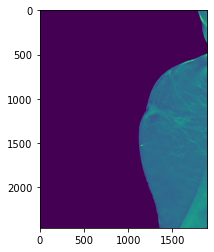

In [39]:
data.view(dicom_name='BT.2.25.25967906531308168040671271408135527531')